In [1]:
import shutil
import os

# Define source and destination directories
src_directory = "/kaggle/input/tcd-yolov10-models/yolov10-models/weights/"
dst_directory = "/kaggle/working/yolov10model"

# Copy the entire directory with dirs_exist_ok=True
shutil.copytree(src_directory, dst_directory, dirs_exist_ok=True)

print(f"Copied {src_directory} to {dst_directory} successfully!")


Copied /kaggle/input/tcd-yolov10-models/model_files/runs/detect/yolov10l_ppe_css_300_epochs/weights to /kaggle/working/yolov10model successfully!


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RoILXxeyIqBkITIuYmKf")
project = rf.workspace("tishas-workplace").project("traffic-congestion-detection-vbbnb")
version = project.version(2)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you h


Extracting Dataset Version Zip to Traffic-Congestion-Detection-2 in yolov9:: 100%|██████████| 6672/6672 [00:01<00:00, 5363.79it/s]


In [4]:
pip install matplotlib opencv-python


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os

# Define the current and new directory paths
current_directory = '/kaggle/working/Traffic-Congestion-Detection-2'
new_directory = '/kaggle/working/Traffic-Congestion-Detection-1'

# Rename the directory
os.rename(current_directory, new_directory)

print(f"Renamed {current_directory} to {new_directory} successfully!")


Renamed /kaggle/working/Traffic-Congestion-Detection-2 to /kaggle/working/Traffic-Congestion-Detection-1 successfully!


In [6]:
%%time

! pip install --upgrade ultralytics -qq

CPU times: user 326 ms, sys: 64.6 ms, total: 391 ms
Wall time: 17 s


In [7]:
import ultralytics
print(ultralytics.__version__)

8.2.51


In [8]:
import warnings
warnings.filterwarnings("ignore")

import os
import re
import glob
import random
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

import IPython.display as display
from PIL import Image
import cv2

from ultralytics import YOLO

In [9]:
! wandb disabled

W&B disabled.


In [10]:
import yaml

# Define the new content to be written into the YAML file
new_content = {
    'names': [
        'Bike',
        'Bus',
        'Car',
        'Cng',
        'Cycle',
        'Mini-Truck',
        'People',
        'Rickshaw',
        'Truck'
    ],
    'nc': 9,
    'test': '/kaggle/working/Traffic-Congestion-Detection-1/test/images',
    'train': '/kaggle/working/Traffic-Congestion-Detection-1/train/images',
    'val': '/kaggle/working/Traffic-Congestion-Detection-1/valid/images'
}

# Path to the YAML file
yaml_file_path = '/kaggle/working/Traffic-Congestion-Detection-1/data.yaml'

# Write the new content to the YAML file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(new_content, yaml_file, default_flow_style=False)

print("YAML file updated successfully.")


YAML file updated successfully.


In [11]:
import yaml

# Path to the YAML file
yaml_file_path = '/kaggle/working/Traffic-Congestion-Detection-1/data.yaml'

# Read and print the content of the YAML file
with open(yaml_file_path, 'r') as yaml_file:
    content = yaml.safe_load(yaml_file)

print(yaml.dump(content, default_flow_style=False))


names:
- Bike
- Bus
- Car
- Cng
- Cycle
- Mini-Truck
- People
- Rickshaw
- Truck
nc: 9
test: /kaggle/working/Traffic-Congestion-Detection-1/test/images
train: /kaggle/working/Traffic-Congestion-Detection-1/train/images
val: /kaggle/working/Traffic-Congestion-Detection-1/valid/images



In [12]:
!apt-get update
!apt-get install -y cmake git libgtk2.0-dev pkg-config

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:3 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1225 B]   
Get:4 https://packages.cloud.google.com/apt cloud-sdk InRelease [1616 B]       
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]
Get:6 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [24.1 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [3758 kB]
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Get:9 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [3089 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [33.5 kB]
Get:11 https://packages.cloud.google.com/apt cloud-sdk/main all Packages [1475 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [3733 kB]
Get:13 http://security.ubun

In [13]:
!pip uninstall -y opencv-python
!pip uninstall -y opencv-contrib-python

!pip install opencv-contrib-python
!pip install opencv-python

Found existing installation: opencv-python 4.10.0.82
Uninstalling opencv-python-4.10.0.82:
  Successfully uninstalled opencv-python-4.10.0.82
Found existing installation: opencv-contrib-python 4.10.0.82
Uninstalling opencv-contrib-python-4.10.0.82:
  Successfully uninstalled opencv-contrib-python-4.10.0.82
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 20.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 21.4 MB/s eta 0:00:00:00:0100:01


In [14]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 78 (delta 7), reused 11 (delta 3), pack-reused 57
Unpacking objects: 100% (78/78), 29.77 MiB | 7.99 MiB/s, done.


In [15]:
!pip install grad-cam
!pip install torch-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.2-py3-none-any.whl size=38335 sha256=6004309cfec67765f312dc9d2f87288d46c052deca4c5f6e53144125a34add8c
  Stored in directory: /root/.cache/pip/wheels/b4/68/bb/d10381e86dc0de1c9354bce3d86bffcd247305058c40ce2e55
Successfully built grad-cam
ERROR: Could not find a version that satisfies the requirement torch-cam (from versions: none)
ERROR: No matching distribution found for torch-cam


In [16]:
# Adjust the Python path
import sys
sys.path.append('/kaggle/working/YOLO-V8-CAM')

# Import the necessary modules
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image


image 1/1 /kaggle/working/Traffic-Congestion-Detection-1/train/images/85_jpg.rf.69d0d5f1b3f78cf19c4aad790169a214.jpg: 640x640 5 Bikes, 4 Buss, 42 Cars, 14 Cngs, 2 Mini-Trucks, 2 Peoples, 2750.6ms
Speed: 9.6ms preprocess, 2750.6ms inference, 10.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


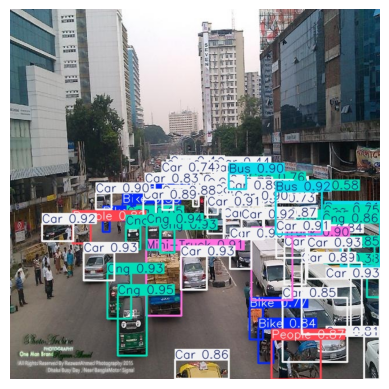

Annotations: [(186, 494, 236, 599, 'Cng'), (236, 371, 259, 416, 'Cng'), (589, 465, 639, 557, 'Car'), (127, 421, 180, 469, 'Car'), (295, 427, 340, 485, 'Car'), (168, 457, 209, 535, 'Cng'), (514, 412, 585, 466, 'Car'), (260, 381, 284, 421, 'Cng'), (459, 315, 539, 389, 'Bus'), (400, 363, 439, 398, 'Car'), (55, 371, 109, 401, 'Car'), (235, 416, 296, 530, 'Mini-Truck'), (460, 383, 513, 430, 'Car'), (200, 374, 225, 415, 'Cng'), (341, 341, 371, 388, 'Car'), (380, 396, 417, 449, 'Car'), (417, 394, 488, 503, 'Mini-Truck'), (369, 361, 400, 412, 'Car'), (148, 318, 175, 346, 'Car'), (378, 284, 408, 311, 'Bus'), (388, 331, 413, 357, 'Car'), (230, 329, 252, 357, 'Car'), (474, 410, 511, 476, 'Car'), (504, 438, 608, 562, 'Car'), (375, 313, 398, 337, 'Car'), (263, 322, 282, 347, 'Car'), (437, 360, 474, 395, 'Car'), (452, 571, 537, 640, 'People'), (540, 370, 573, 407, 'Cng'), (285, 606, 378, 639, 'Car'), (471, 499, 583, 610, 'Car'), (491, 365, 520, 408, 'Cng'), (587, 410, 630, 465, 'Cng'), (411, 317, 43

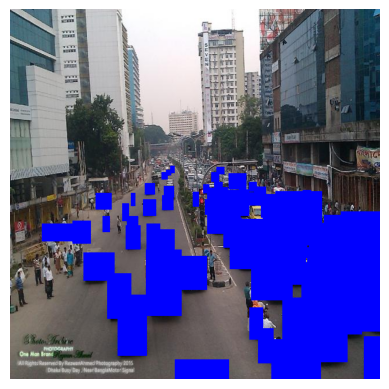

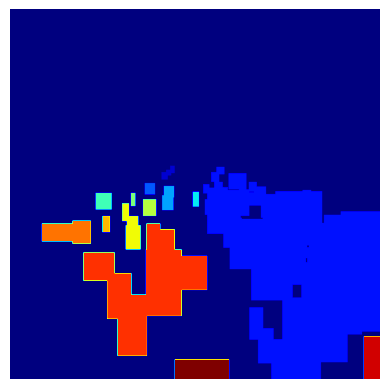

Number of fully colored regions: 15
Region 1: 3 boxes
Region 2: 43 boxes
Region 3: 1 boxes
Region 4: 2 boxes
Region 5: 1 boxes
Region 6: 1 boxes
Region 7: 1 boxes
Region 8: 1 boxes
Region 9: 4 boxes
Region 10: 1 boxes
Region 11: 2 boxes
Region 12: 7 boxes
Region 13: 1 boxes
Region 14: 1 boxes
Congestion Levels: [(2, 43, 'Heavy Congested Region', 0), (12, 7, 'Light Congested Region', 3)]


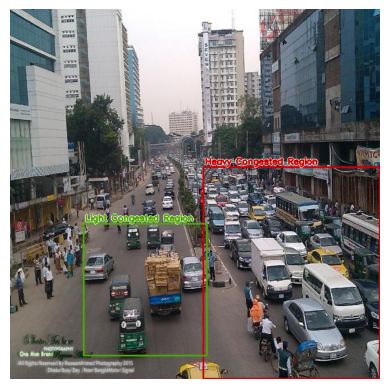

Heavy Congested Region with 43 boxes: {'Bike': 2, 'Bus': 4, 'Car': 28, 'Cng': 7, 'Cycle': 0, 'Mini-Truck': 1, 'People': 1, 'Rickshaw': 0, 'Truck': 0}
Light Congested Region with 7 boxes: {'Bike': 0, 'Bus': 0, 'Car': 2, 'Cng': 4, 'Cycle': 0, 'Mini-Truck': 1, 'People': 0, 'Rickshaw': 0, 'Truck': 0}

0: 640x640 6 Bikes, 4 Buss, 46 Cars, 14 Cngs, 5 Mini-Trucks, 2 Peoples, 2450.0ms
Speed: 2.7ms preprocess, 2450.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


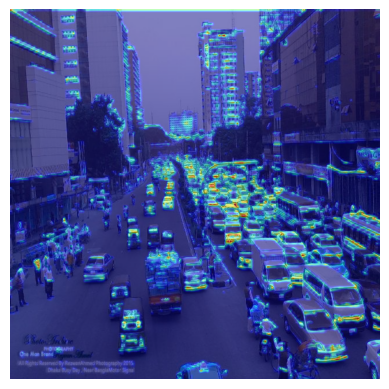

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

class CFG:
    DEBUG = False
    FRACTION = 0.05 if DEBUG else 1.0
    SEED = 88

    # classes
    CLASSES = [
        'Bike',
        'Bus',
        'Car',
        'Cng',
        'Cycle',
        'Mini-Truck',
        'People',
        'Rickshaw',
        'Truck'
    ]
    NUM_CLASSES_TO_TRAIN = len(CLASSES)

    # training
    EPOCHS = 5 if DEBUG else 120
    BATCH_SIZE = 6
    
    BASE_MODEL = '/kaggle/working/yolov10model/best'
    BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'
    EXP_NAME = f'ppe_css_{EPOCHS}_epochs'
    
    OPTIMIZER = 'auto'
    LR = 1e-3
    LR_FACTOR = 0.01
    WEIGHT_DECAY = 5e-4
    DROPOUT = 0.0
    PATIENCE = 20
    PROFILE = False
    LABEL_SMOOTHING = 0.0    

    # paths
    CUSTOM_DATASET_DIR = '/kaggle/working/Traffic-Congestion-Detection-1/'
    OUTPUT_DIR = '/kaggle/working/'

model = YOLO(CFG.BASE_MODEL_WEIGHTS)

def display_image(image_path):
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def load_annotations(txt_file_path):
    annotations = []
    with open(txt_file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            cls, x_center, y_center, width, height, conf = map(float, parts)
            x_min = int((x_center - width / 2) * 640)
            y_min = int((y_center - height / 2) * 640)
            x_max = int((x_center + width / 2) * 640)
            y_max = int((y_center + height / 2) * 640)
            annotations.append((x_min, y_min, x_max, y_max, CFG.CLASSES[int(cls)]))
    return annotations

def fill_bounding_boxes(image_path, annotations):
    image = cv2.imread(image_path)
    for annotation in annotations:
        x_min, y_min, x_max, y_max, _ = annotation
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), cv2.FILLED)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return image

def find_fully_colored_regions(image):
    mask = cv2.inRange(image, (255, 0, 0), (255, 0, 0))
    num_labels, labels_im = cv2.connectedComponents(mask)
    plt.imshow(labels_im, cmap='jet')
    plt.axis('off')
    plt.show()
    return labels_im, num_labels

def assign_congestion_levels(labels_im, annotations):
    congestion_levels = []
    for region_label in range(1, np.max(labels_im) + 1):
        mask = labels_im == region_label
        num_boxes = sum(1 for annotation in annotations if mask[annotation[1]:annotation[3], annotation[0]:annotation[2]].any())
        print(f"Region {region_label}: {num_boxes} boxes")
        if num_boxes > 20:
            label = "Heavy Congested Region"
            congestion_level = 0
        elif 15 <= num_boxes <= 20:
            label = "Moderate Congested Region"
            congestion_level = 1
        elif 10 <= num_boxes <= 15:
            label = "Mild Congested Region"
            congestion_level = 2
        elif 7 <= num_boxes <= 10:
            label = "Light Congested Region"
            congestion_level = 3
        else:
            continue
        congestion_levels.append((region_label, num_boxes, label, congestion_level))
    return congestion_levels

def draw_congested_regions(image_path, labels_im, congestion_levels):
    image = cv2.imread(image_path)
    for region_label, num_boxes, label, congestion_level in congestion_levels:
        mask = labels_im == region_label
        y, x = np.where(mask)
        x_min, x_max, y_min, y_max = x.min(), x.max(), y.min(), y.max()

        # Determine text color based on background color of bounding box
        if congestion_level == 0:
            box_color = (0, 0, 204)  # Red
            text_color = (0, 0, 204)  # White text for red background
        elif congestion_level == 1:
            box_color = (0, 91, 204)  # Blue
            text_color = (0, 91, 204)  # White text for blue background
        elif congestion_level == 2:
            box_color = (1, 140, 168)  # Green
            text_color = (1, 140, 168)  # Black text for green background
        elif congestion_level == 3:
            box_color = (1, 168, 79)  # Yellow
            text_color = (1, 168, 79)  # Black text for yellow background
        else:
            continue

        # Draw bounding box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), box_color, 2)

        # Draw congestion level text with border
        cv2.putText(image, label, (x_min + 3, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 3)
        cv2.putText(image, label, (x_min + 3, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def generate_insights(congestion_levels, annotations, labels_im):
    for region_label, num_boxes, label, _ in congestion_levels:
        vehicle_counts = {cls: 0 for cls in CFG.CLASSES}
        for annotation in annotations:
            x_min, y_min, x_max, y_max, cls = annotation
            if (labels_im[y_min:y_max, x_min:x_max] == region_label).any():
                vehicle_counts[cls] += 1
        print(f"{label} with {num_boxes} boxes: {vehicle_counts}")

def visualize_cam(input_image_path):
    target_layers = [model.model.model[1]]
    img = cv2.imread(input_image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255
    cam = EigenCAM(model, target_layers, task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    plt.imshow(cam_image)
    plt.axis('off')
    plt.show()

def run_pipeline(input_image_path):
    # Predict the objects in the image
    results = model.predict(
        source=input_image_path,
        classes=[0, 1, 2, 3, 4, 5, 6, 7, 8],
        conf=0.30,
        imgsz=(640, 640),
        save=True,
        save_txt=True,
        save_conf=True,
        exist_ok=True,
    )

    # Display the image with detected objects
    example_image_inference_output = input_image_path.split('/')[-1]
    display_image(f'/kaggle/working/runs/detect/predict/{example_image_inference_output}')

    # Load annotations from the saved text file
    annotations_file_path = f'/kaggle/working/runs/detect/predict/labels/{example_image_inference_output.replace(".jpg", ".txt")}'
    annotations = load_annotations(annotations_file_path)
    print(f"Annotations: {annotations}")

    # Fill bounding boxes with blue color on the image
    filled_image = fill_bounding_boxes(input_image_path, annotations)

    # Find fully colored regions within the image
    labels_im, num_labels = find_fully_colored_regions(filled_image)
    print(f"Number of fully colored regions: {num_labels}")

    # Count bounding boxes within each fully colored region and assign congestion levels
    congestion_levels = assign_congestion_levels(labels_im, annotations)
    print(f"Congestion Levels: {congestion_levels}")

    # Draw congested regions and save annotations in YOLOv9 format
    draw_congested_regions(input_image_path, labels_im, congestion_levels)

    # Save the annotations in YOLOv9 format
    annotation_path = input_image_path.replace('.jpg', '.txt')
    with open(annotation_path, 'w') as f:
        for region_label, num_boxes, label, congestion_level in congestion_levels:
            mask = labels_im == region_label
            y, x = np.where(mask)
            x_min, x_max, y_min, y_max = x.min(), x.max(), y.min(), y.max()
            f.write(f"{congestion_level} {x_min} {y_min} {x_max - x_min} {y_max - y_min}\n")

    # Generate insights
    generate_insights(congestion_levels, annotations, labels_im)

    # Visualize CAM
    visualize_cam(input_image_path)

input_image_path = '/kaggle/working/Traffic-Congestion-Detection-1/train/images/85_jpg.rf.69d0d5f1b3f78cf19c4aad790169a214.jpg'
run_pipeline(input_image_path)


In [19]:
# YOLO model
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-2): 3 x Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplac

---

---